# LightGBM　お試し
#### パラメーター
- https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst
- http://lightgbm.readthedocs.io/en/latest/Installation-Guide.html
- https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
- 公式には書かれてないが、applicationを分離した、objectionとmetricがある模様

In [3]:
import lightgbm as lgbm
import numpy as np
from sklearn.cross_validation import KFold, train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.grid_search import GridSearchCV
import pandas as pd

import warnings #エラーを防ぐ
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
train_df6 =pd.read_csv("train.csv", header=0)
test_df6 =pd.read_csv("test.csv", header=0)
test_df6.tail()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
413,1,0.377084,0,0,8.0500,0,0,1,0,0,1
414,0,0.486409,0,0,108.9000,1,0,0,1,0,0
415,1,0.480145,0,0,7.2500,0,0,1,0,0,1
416,1,0.377084,0,0,8.0500,0,0,1,0,0,1
417,1,0.377084,1,1,22.3583,0,0,1,1,0,0


In [9]:
# 学習データと評価データに分ける
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(0.2)):
    #目的変数を抽出
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)#arrayにしている
    
    #目的変数を消す
    data_x = data.drop(["Survived"], axis=1)
    
    #pandasで分ける
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x.values, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_df6)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))
train_y = train_y.T[0]
valid_y = valid_y.T[0]

train_x:(712, 11)
train_y:(712, 1)
valid_x:(179, 11)
valid_y:(179, 1)


In [10]:
params={"objective": "binary:logistic", 
        "eval_metric": "error",
        #"num_class": 3, 
        
        #"eta": 0.3, 
        #'n_estimators': 100,
        
        
        #"max_depth": 6, 
        #"gamma": 0,
        #"min_child_weight": 1, 
        #"subsample": 1, 
        #"colsample_bytree": 1,
    
        #"reg_lambda":, 
        #"reg_alpha":
        }

In [11]:
params = {
  'nthread': 4, 
  'applicatin':  'binary', 
  
  #'learning_rate': 0.05,  
  #'num_leaves': 31,#葉の数
  #'num_boost_round':100 #木の本数

  #'subsample': 0.8, # bagging_fraction
  #'colsample_bytree': 0.8, # feature_fraction 
  
  #'reg_alpha': 5,
  #'reg_lambda': 10,
}


model = lgbm.LGBMClassifier(**params)
class_cv = GridSearchCV(model,
                   {'learning_rate': [0.05,0.1,0.15,0.20,0.25,0.3],
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
0.8356741573033708
{'learning_rate': 0.05}


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.6s finished


In [16]:
params = {
  'nthread': 4, 
  'applicatin':  'binary', #regression,multiclass
  
  'learning_rate': 0.05,  
  #'num_leaves': 31,#葉の数
  #'num_boost_round':100 #木の本数

  #'subsample': 0.8, # bagging_fraction
  #'colsample_bytree': 0.8, # feature_fraction 
  
  #'reg_alpha': 5,
  #'reg_lambda': 10,
}


model = lgbm.LGBMClassifier(**params)#LGBMRegressor
class_cv = GridSearchCV(model,
                   {'num_leaves': [15,31,63,127],#葉の数
                    #'num_boost_round':[250,100,150,200] #木の本数 何故かエラーを吐く
                   },verbose = 1)
class_cv.fit(train_x,train_y)
print(class_cv.best_score_)#評価関数でのスコア、通常は正答率に該当
print(class_cv.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
0.8356741573033708
{'num_leaves': 31}


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.4s finished


In [17]:
params = {
  'nthread': 4, 
  'applicatin':  'binary', #regression,multiclass
  
  'learning_rate': 0.05,  
  'num_leaves': 31,#葉の数
  #'num_boost_round':100 #木の本数

  #'subsample': 0.8, # bagging_fraction
  #'colsample_bytree': 0.8, # feature_fraction 
  
  #'reg_alpha': 5,
  #'reg_lambda': 10,
}

clf_class = lgbm.LGBMClassifier(**params)

clf_class.fit(train_x, train_y)

LGBMClassifier(applicatin='binary', boosting_type='gbdt', class_weight=None,
        colsample_bytree=1.0, learning_rate=0.05, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, nthread=4, num_leaves=31,
        objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
        silent=True, subsample=1.0, subsample_for_bin=200000,
        subsample_freq=1)

In [18]:
pred_train = clf_class.predict(train_x)
pred_valid = clf_class.predict(valid_x)
train_score = sum(pred_train== train_y)/len(train_y)
valid_score  = sum(pred_valid== valid_y)/len(valid_y)

train_score,valid_score

(0.9143258426966292, 0.8044692737430168)

In [19]:
pred_valid = clf_class.predict(test_df6.values)
pred_valid

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [20]:
submission =pd.read_csv("id.csv", header=0)
submission["Survived"] = pred_valid
submission.to_csv("submission_lgbm.csv",index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [58]:
from sklearn import tree
clf_class = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
clf_class.fit(train_x, train_y)

pred_train = clf_class.predict(train_x)
pred_valid = clf_class.predict(valid_x)
train_score = sum(pred_train== train_y)/len(train_y)
valid_score  = sum(pred_valid== valid_y)/len(valid_y)

train_score,valid_score

(0.8328651685393258, 0.7988826815642458)

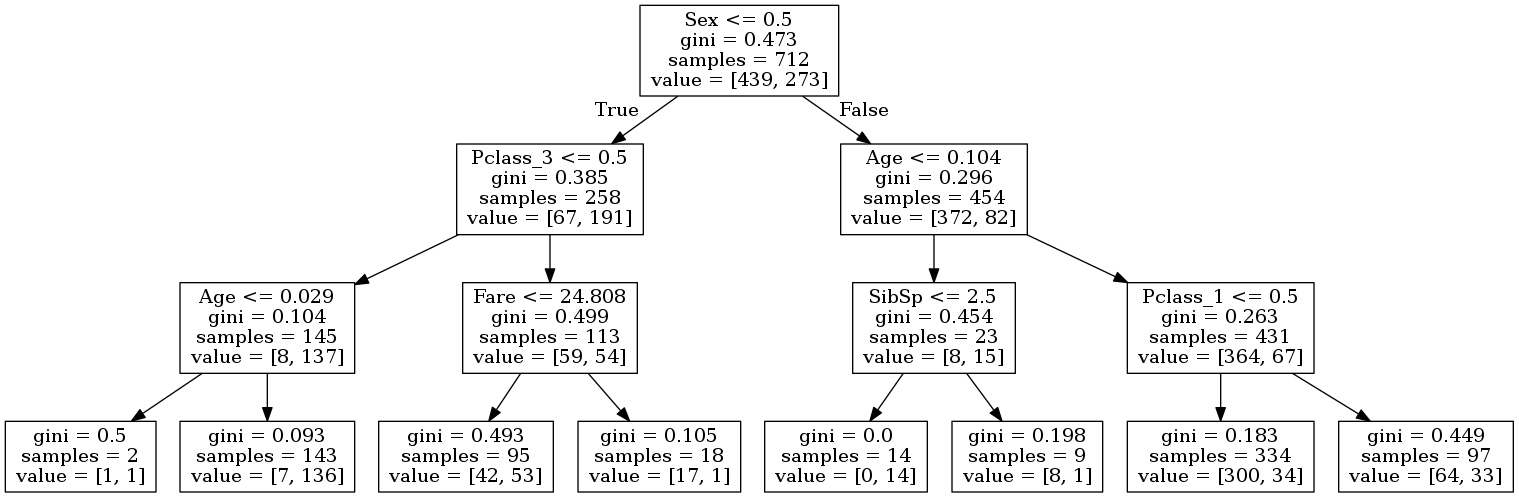

In [59]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf_class, out_file=dot_data,feature_names=test_df6.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())